In [1]:
import pandas as pd                                 # importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/saran/OneDrive/Documents/heart.csv")       #loading dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
df.shape              #checking for rows and columns

(319795, 18)

In [4]:
df.info()              #checking dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()            #checking for null values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated().sum()          #checking for duplicate values

18078

In [7]:
df.drop_duplicates(keep='first',inplace=True)         #dropping the duplicate values

In [8]:
df.shape    #rechecking shape

(301717, 18)

In [9]:
df.describe().style.background_gradient()       # summary statistics

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [10]:
df.describe(exclude='number')        #summary of categorical data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


In [11]:
def seperate_data_types(df):    # deifining function to segregate categorical and numerical columns for efficient visualization
    categorical=[]
    numerical=[]
    for column in df.columns:
        if df[column].nunique()<15:
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical, numerical

categorical, numerical = seperate_data_types(df)

table=[categorical,numerical]
print(tabulate({"Categorical":categorical,
              "Numerical":numerical},headers=["Categorical","Continuous"]))

Categorical       Continuous
----------------  --------------
HeartDisease      BMI
Smoking           PhysicalHealth
AlcoholDrinking   MentalHealth
Stroke            SleepTime
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


#### Exporting files

In [14]:
df.to_csv('C:/Users/saran/OneDrive/Documents/cardiac.csv')

In [15]:
import mysql.connector as sql
from sqlalchemy import create_engine

In [16]:
host='localhost'
user='root'
password='MSqlpass%4023'
db='heartdisease'

In [17]:
engine=create_engine("mysql://{user}:{pw}@{host}/{db}".format(host=host,db=db,pw=password,user=user))

df.to_sql("heart_disease",engine,index=False)

### EDA

In [42]:
def count(*s):
    for i in categorical:
        plt.figure(figsize=(14, 4))
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=i)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=75)
        plt.title(f'Count Plot of {i}')
        
       
        plt.subplot(1, 2, 2)
        data_counts = df[i].value_counts()
        plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Pie Chart of {i}')
        
        plt.show()

### UNIVARIATE ANALYSIS

Categotical

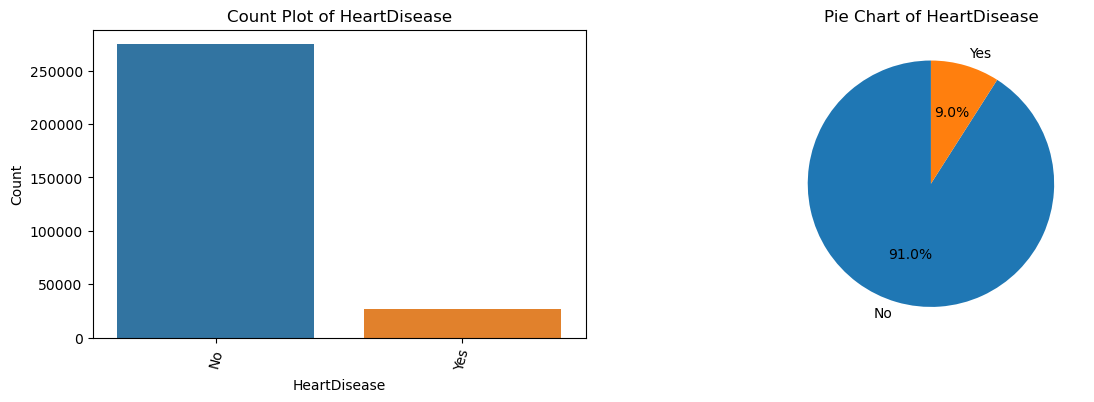

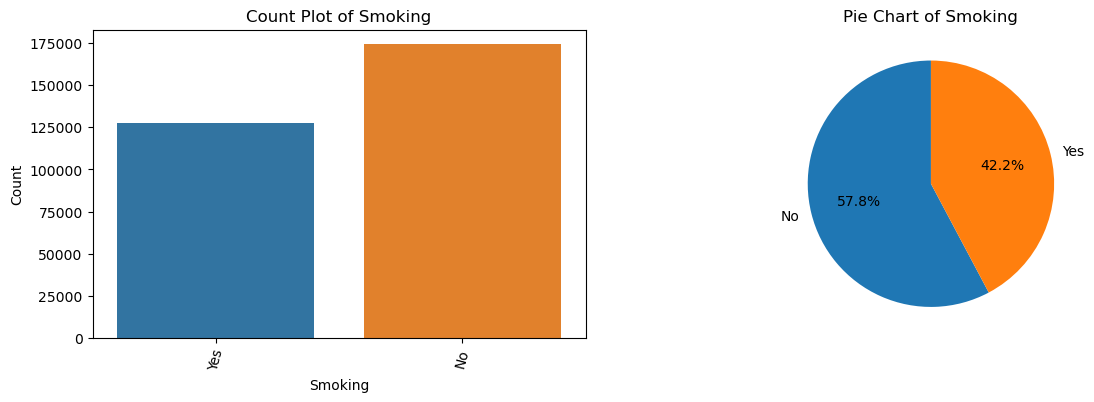

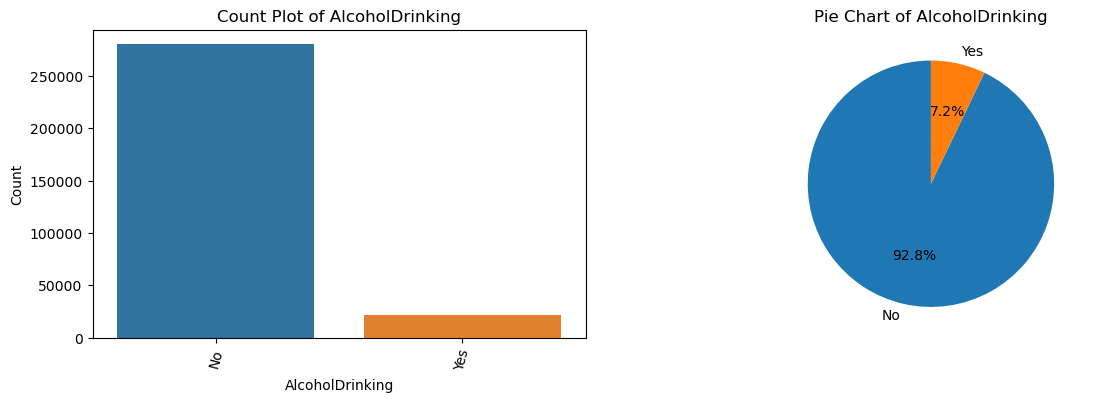

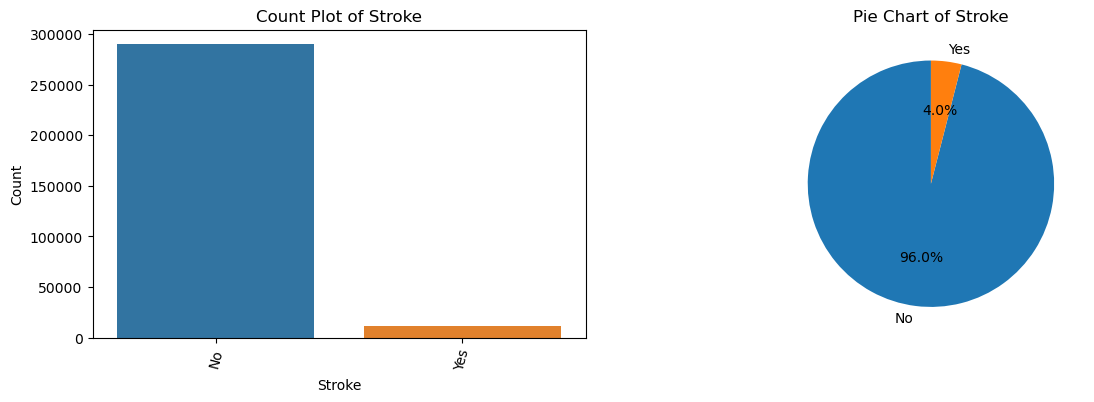

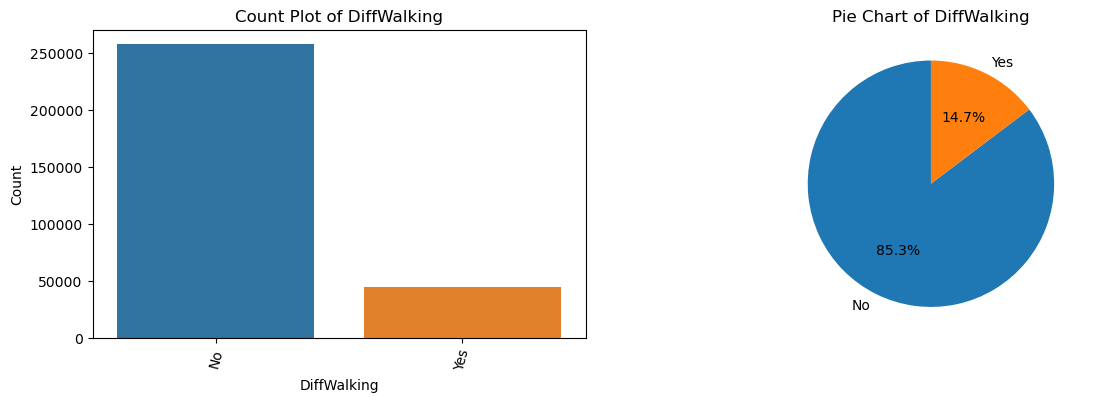

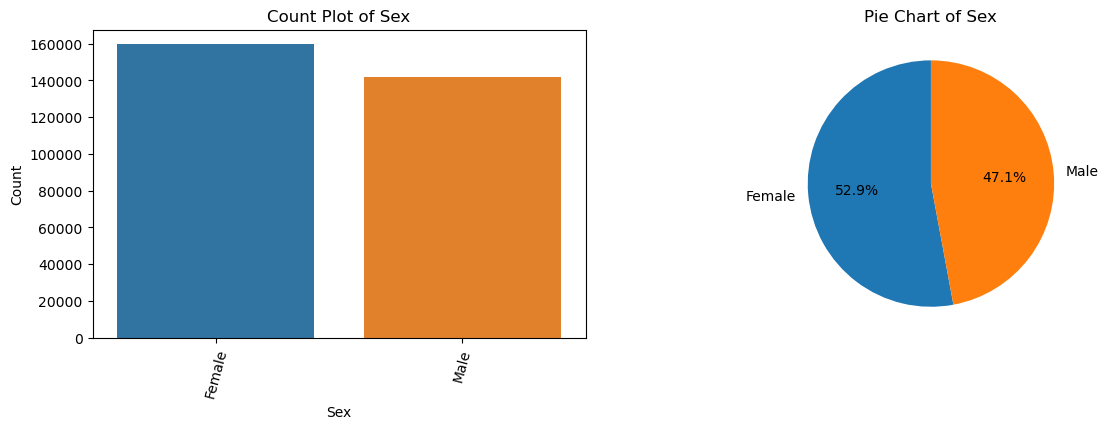

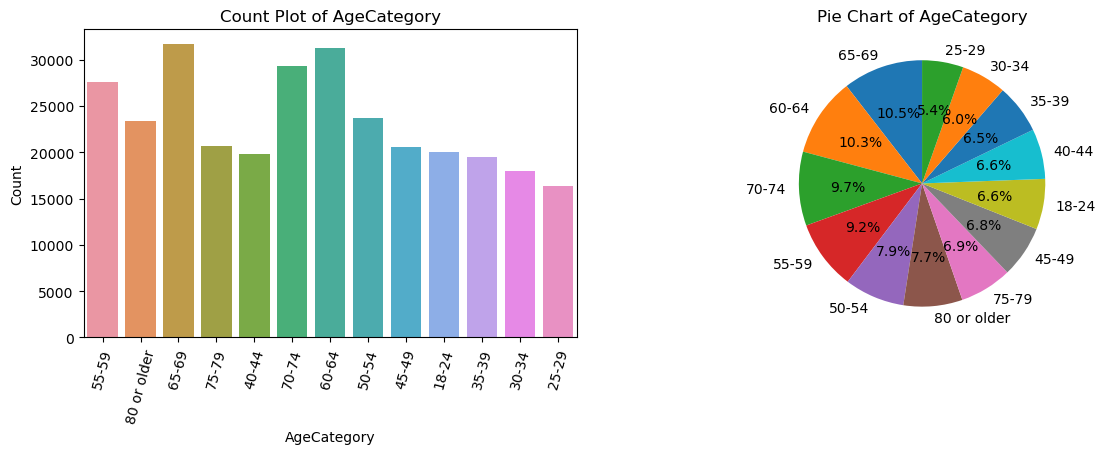

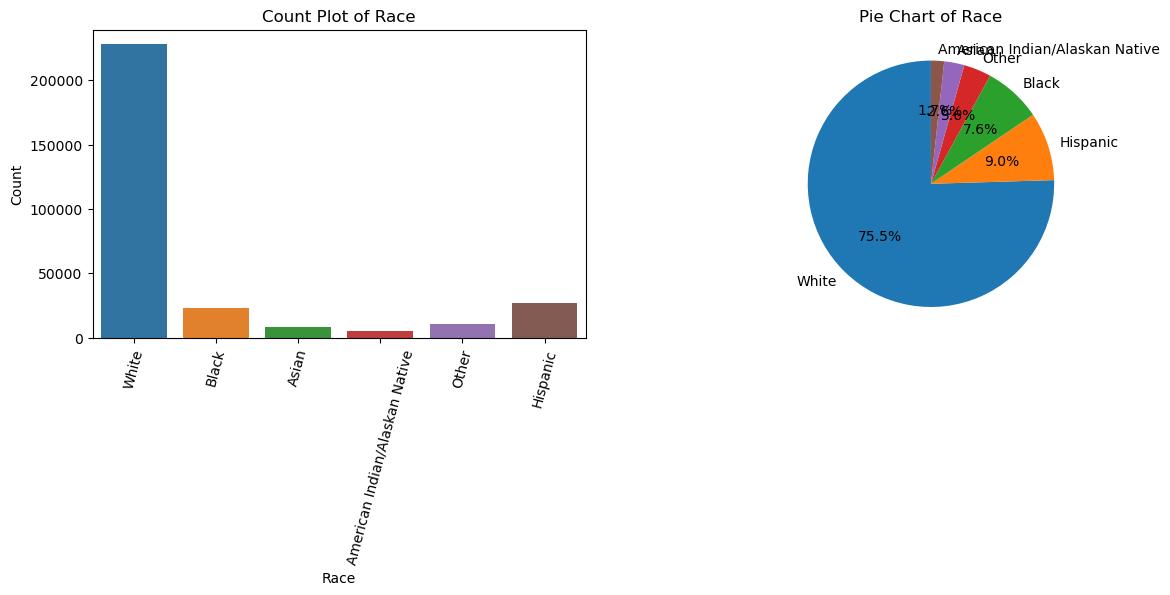

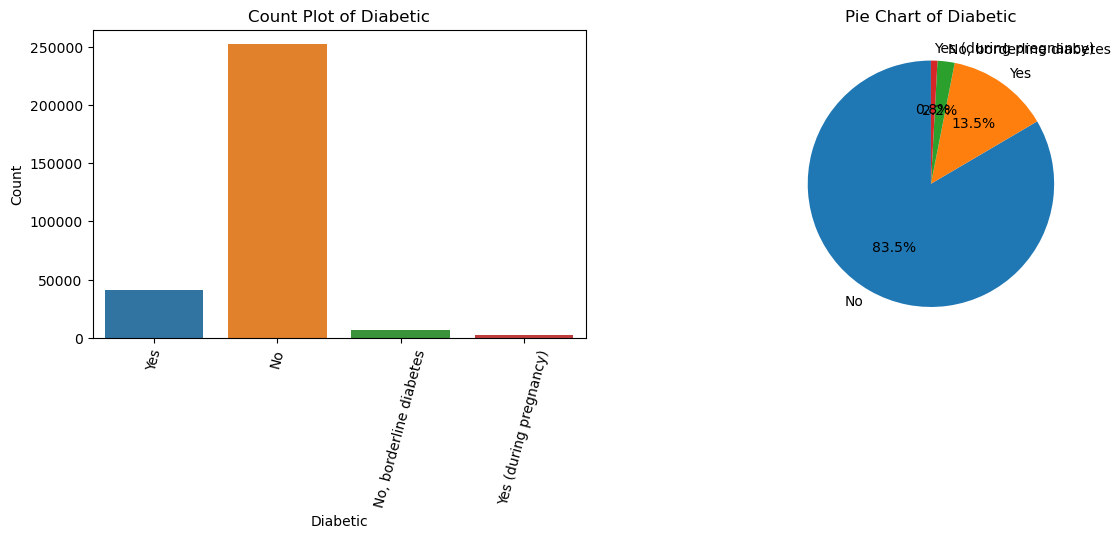

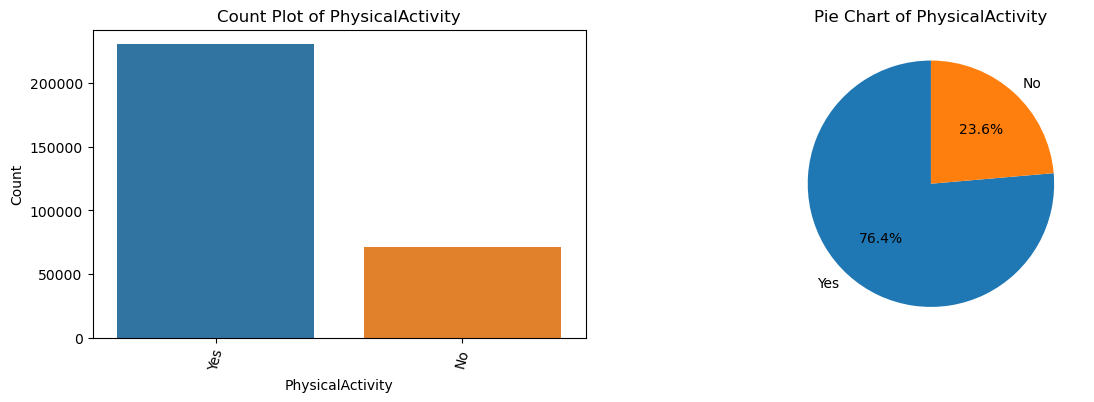

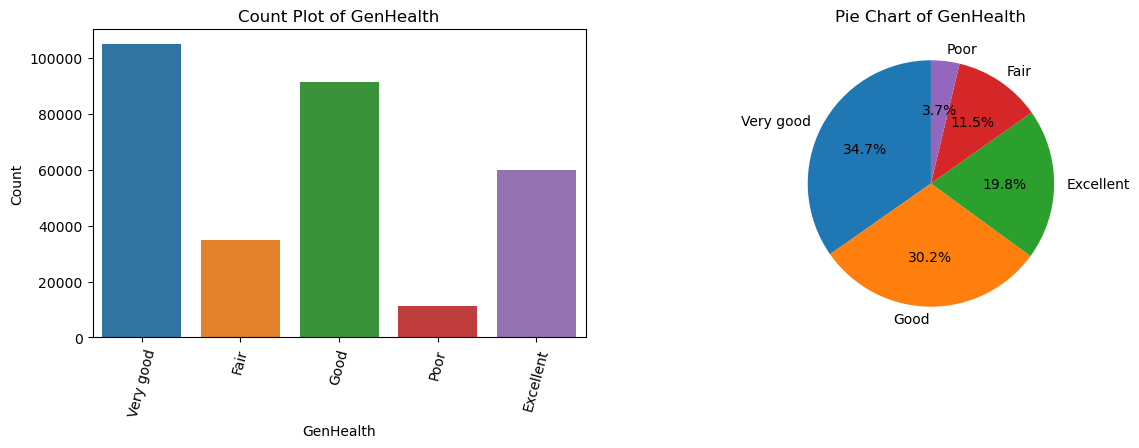

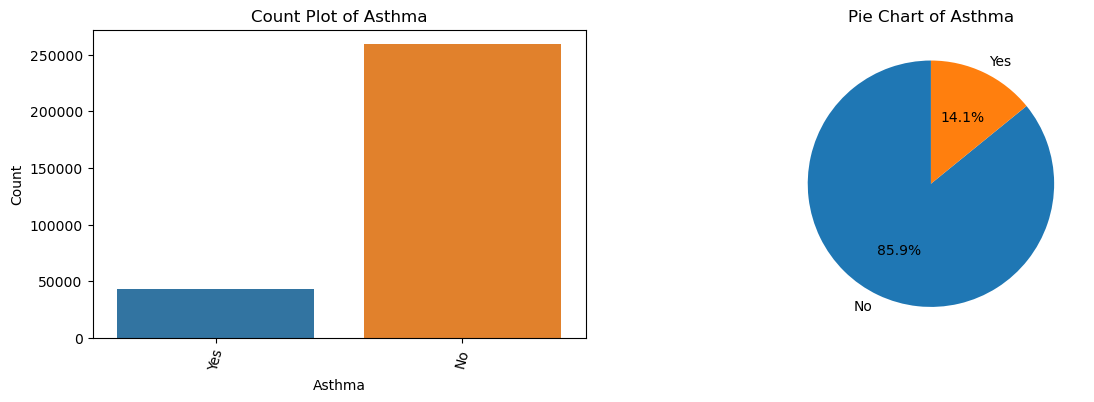

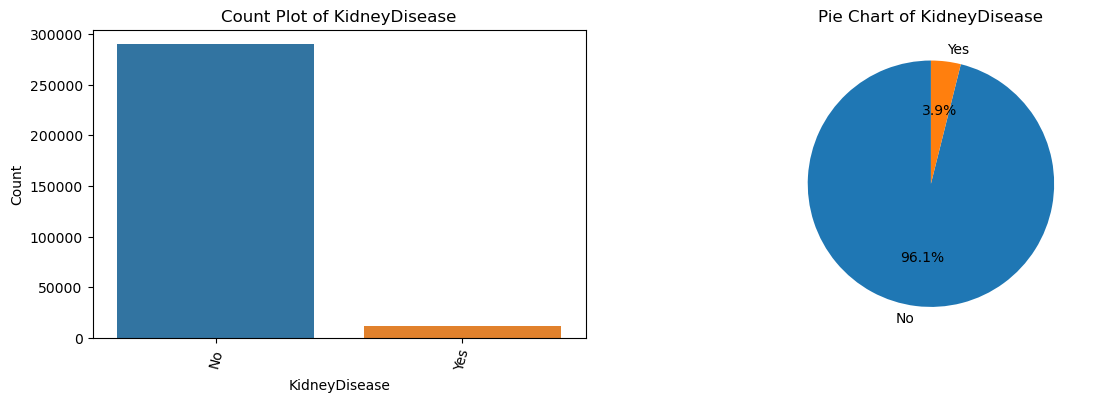

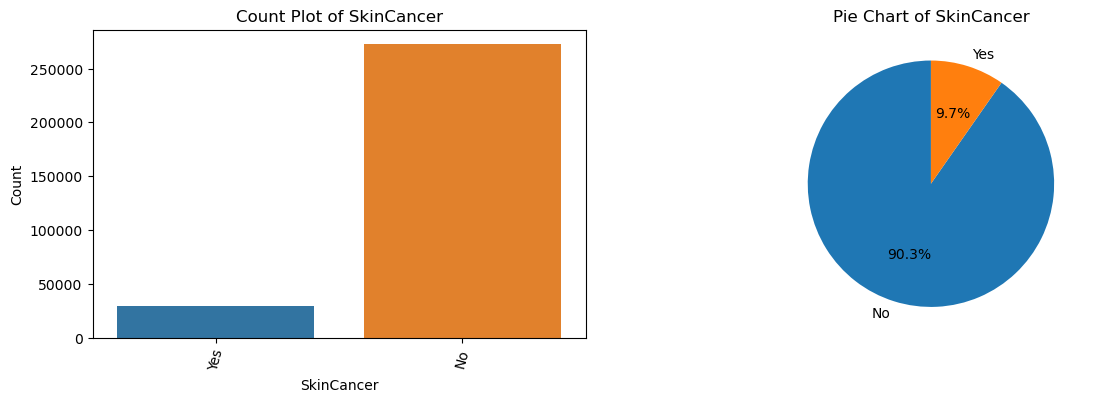

In [43]:
count(categorical)

- 9% of the given population suffers from heart disease, and 4 % of population have suffered from stroke.

- 15% of population suffers from Asthama.

- only a small peecenytage of population of ~4% suffer from kidney diseases.

- A large percentage of the given population (42%) are smokers, while only 7.2% drink alcohol.

- ~15% of population has a difficulty in walking.

- A major percentage of population have some kind of physicakl activity

##### Que
The percentage of patients that have heart disease ?
What is the categories of BMI ?
How many patients that have heart disease are smoking ?
What is the general health of people that have heart disease

Numerical

In [40]:
def hist(*s):                          
    for i in numerical:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=i,hue=df.HeartDisease, kde=True)
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {i}')

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=i)
        plt.ylabel(i)
        plt.title(f'Box Plot of {i}')
        plt.show()

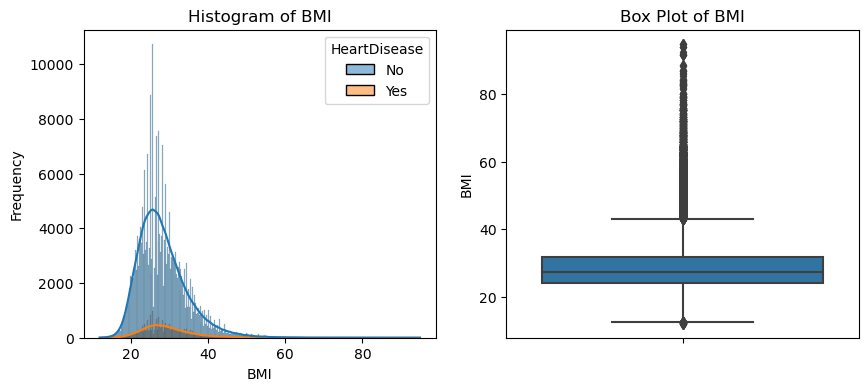

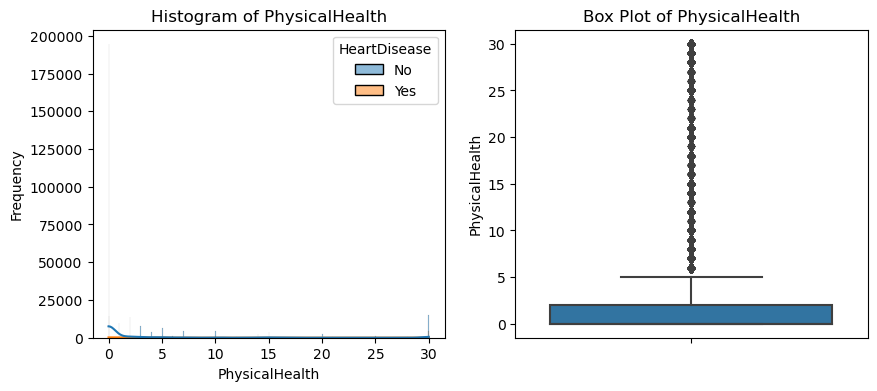

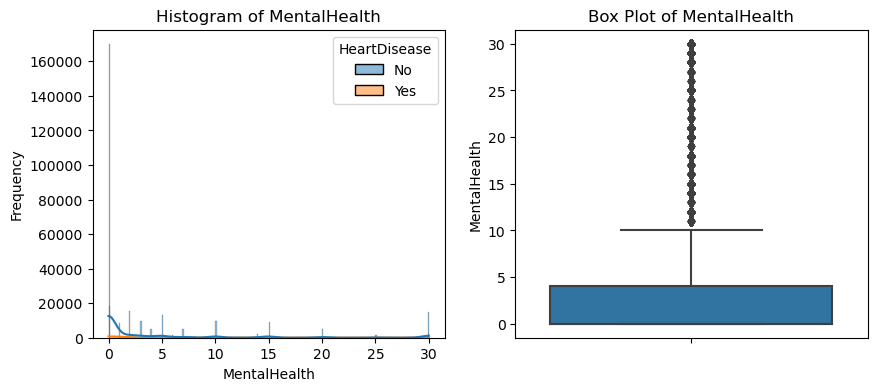

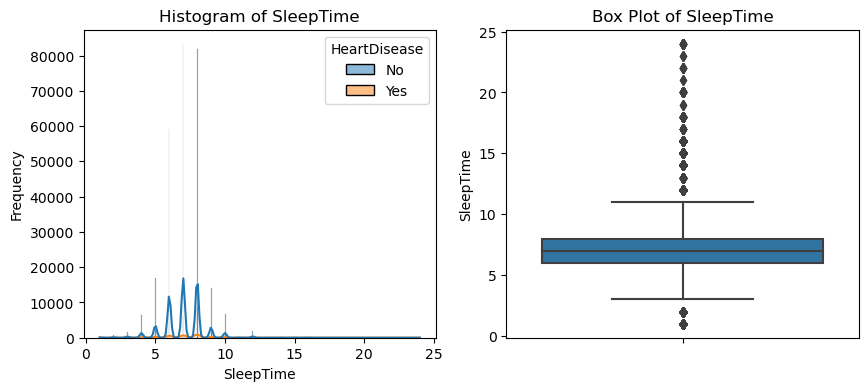

In [41]:
hist(numerical)

In [61]:
df.loc[df['SleepTime']>df['SleepTime'].quantile(0.95),'SleepTime']=df['SleepTime'].quantile(0.95)
df.loc[df['SleepTime']<df['SleepTime'].quantile(0.25),'SleepTime']=df['SleepTime'].quantile(0.25)

Text(0.5, 1.0, 'Histogram of AgeCategory')

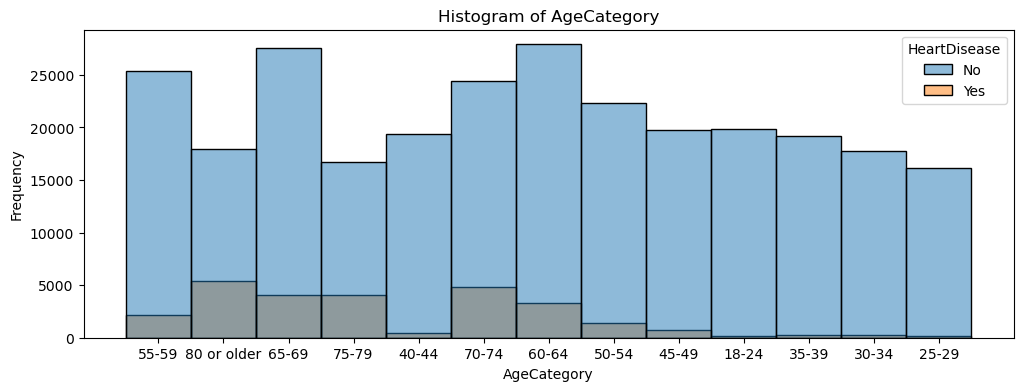

In [23]:

plt.figure(figsize=(12, 4))
sns.histplot(data=df, x='AgeCategory',hue=df.HeartDisease)
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.title('Histogram of AgeCategory')


In [ ]:
#### People with Heart Disease are found to have a higher BMI than people with no Heart Disease
#### 

### BiVariate analysis

<!-- HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     319795 non-null  object 
 17  SkinCancer        319795 non-null  object  -->

In [ ]:
# fig, ax = plt.subplots(figsize = (8,5))
# sns.kdeplot(df["PhysicalHealth"], hue=df["HeartDisease"],alpha=0.5,shade = True, label="No HeartDisease", ax = ax)
# ax.set_xlabel("PhysicalHealth")
# ax.set_ylabel("Frequency")
# plt.legend()
# plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

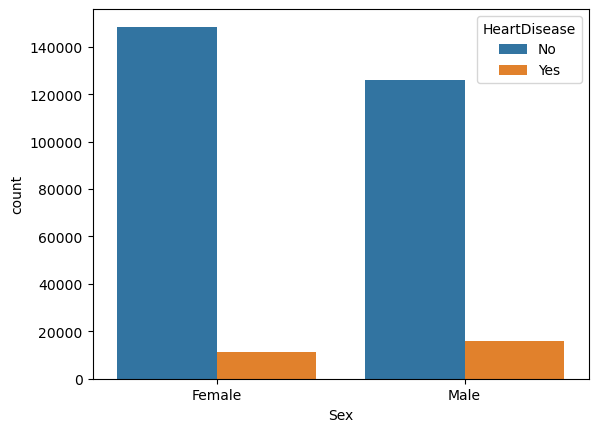

In [64]:
sns.countplot(x =df.Sex,hue = df.HeartDisease)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

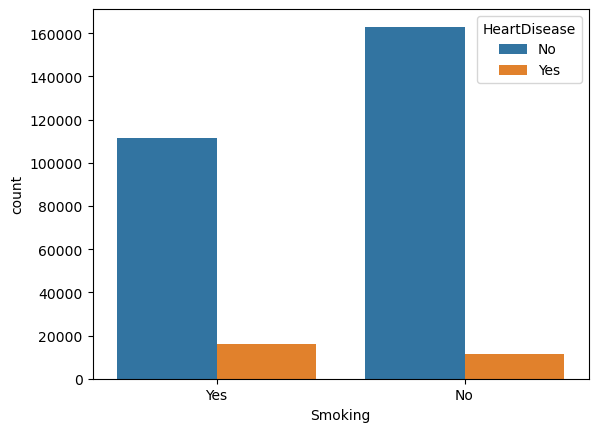

In [65]:
sns.countplot(x =df.Smoking,hue = df.HeartDisease)

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

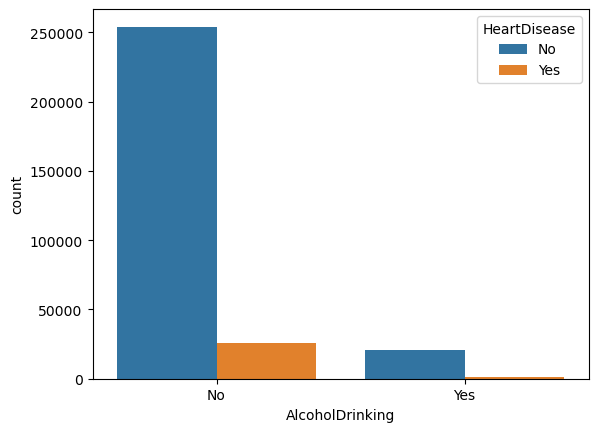

In [66]:
sns.countplot(x =df.AlcoholDrinking,hue=df.HeartDisease)

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

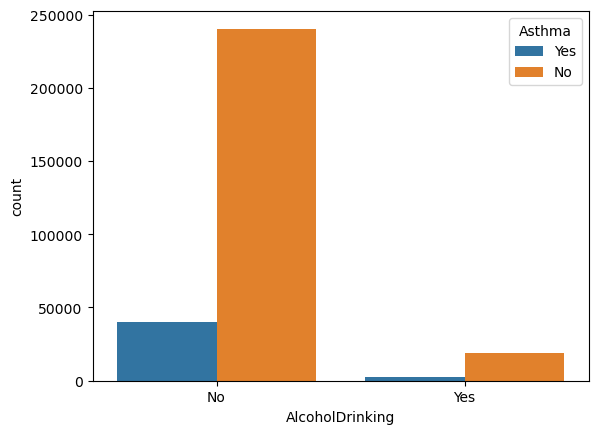

In [25]:
sns.countplot(x =df.AlcoholDrinking,hue=df.Asthma)

<AxesSubplot:xlabel='Race', ylabel='count'>

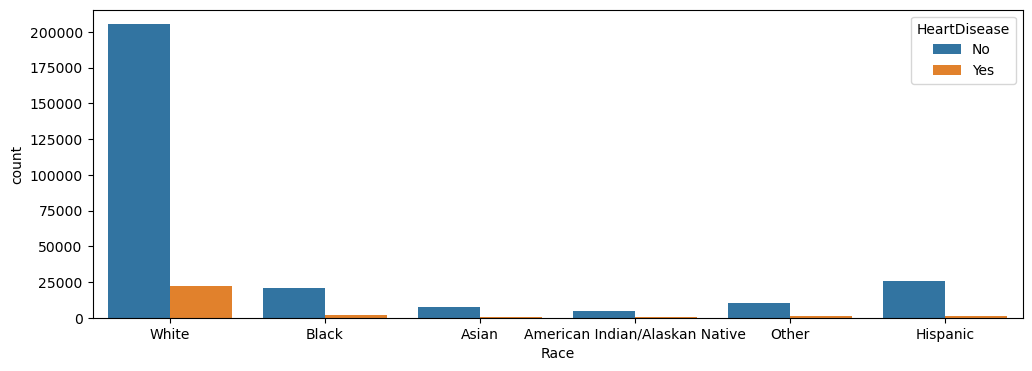

In [27]:
plt.figure(figsize=(1,4))
sns.countplot(x =df.Race,hue=df.HeartDisease)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

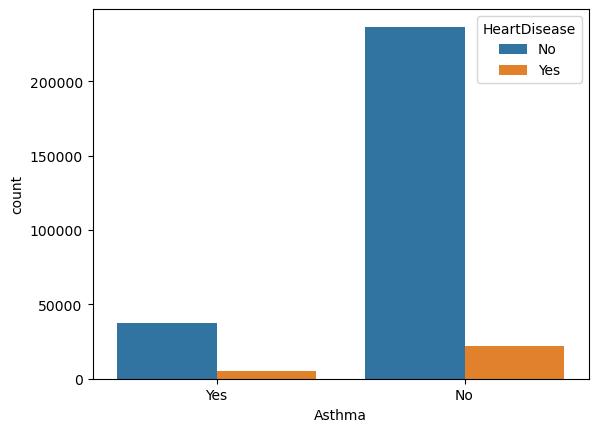

In [54]:
sns.countplot(x =df.Asthma,hue=df.HeartDisease)

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

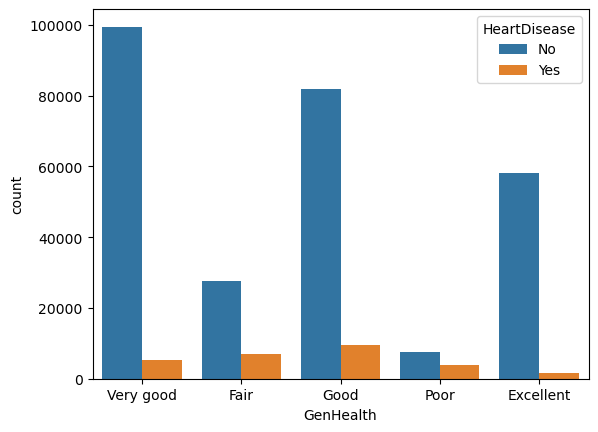

In [90]:
sns.countplot(x =df.GenHealth,hue=df.HeartDisease)

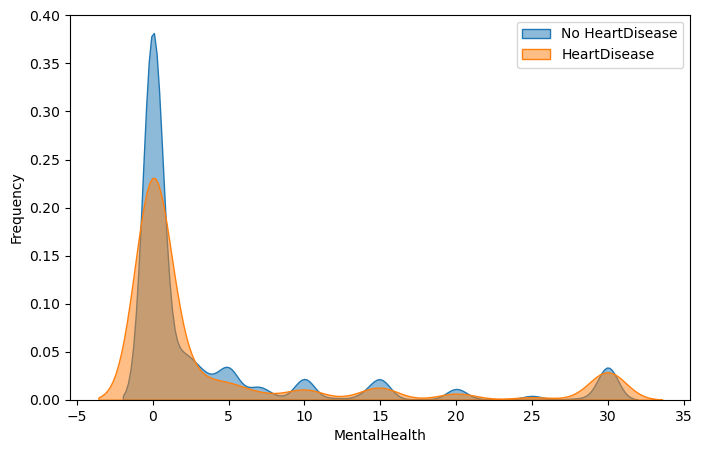

In [96]:
fig, ax = plt.subplots(figsize = (8,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
plt.legend()
plt.show()

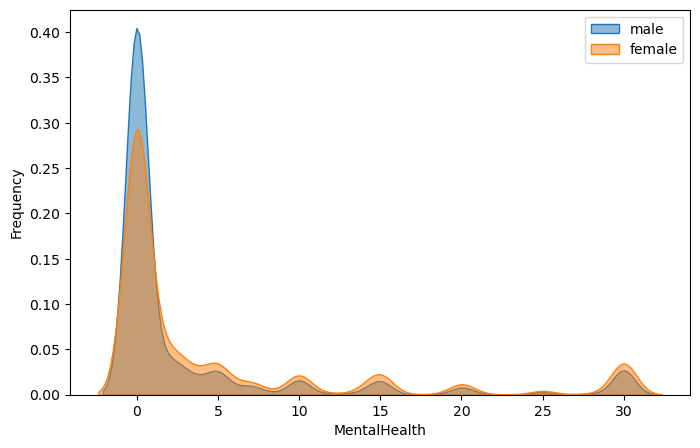

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
sns.kdeplot(df[df["Sex"]=='Male']["MentalHealth"], alpha=0.5,shade = True, label="male", ax = ax)
sns.kdeplot(df[df["Sex"]=='Female']["MentalHealth"], alpha=0.5,shade = True, label="female", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
plt.legend()
plt.show()

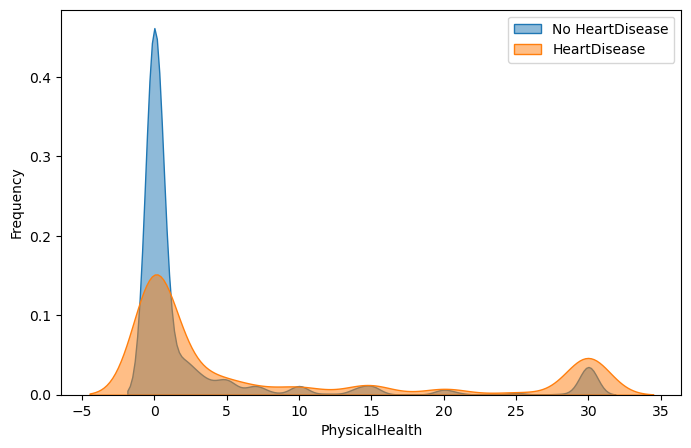

In [97]:
fig, ax = plt.subplots(figsize = (8,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
plt.legend()
plt.show()

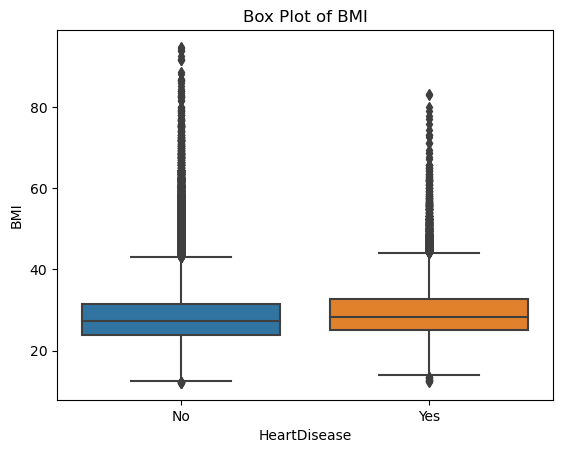

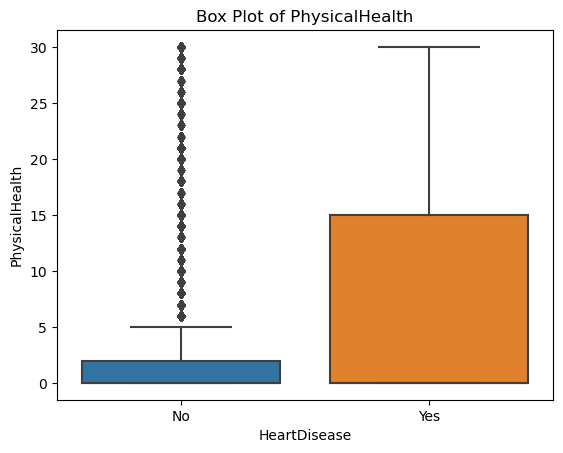

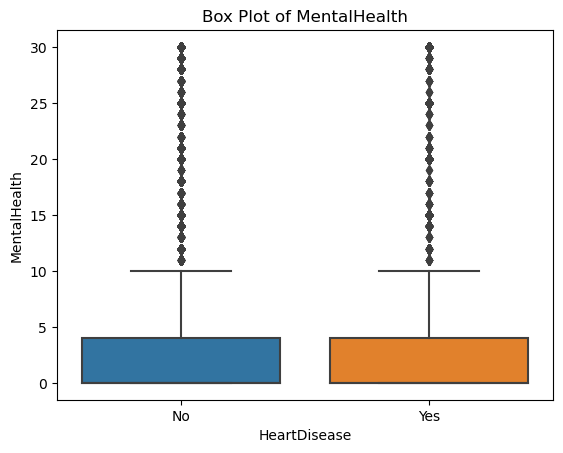

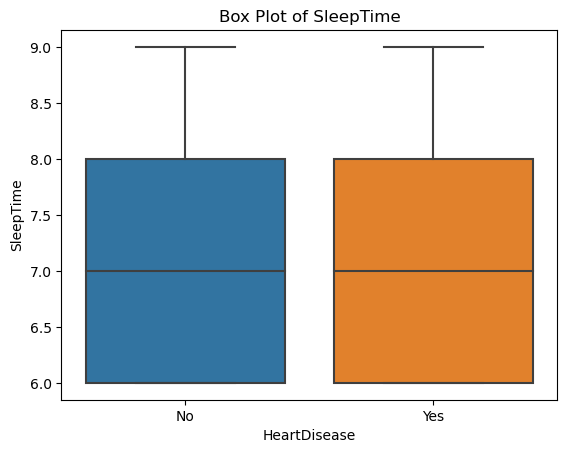

In [95]:
 for i in numerical:
        sns.boxplot(data=df, y=i,x=df.HeartDisease)
        plt.ylabel(i)
        plt.title(f'Box Plot of {i}')
        plt.show()

In [100]:
numerical

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

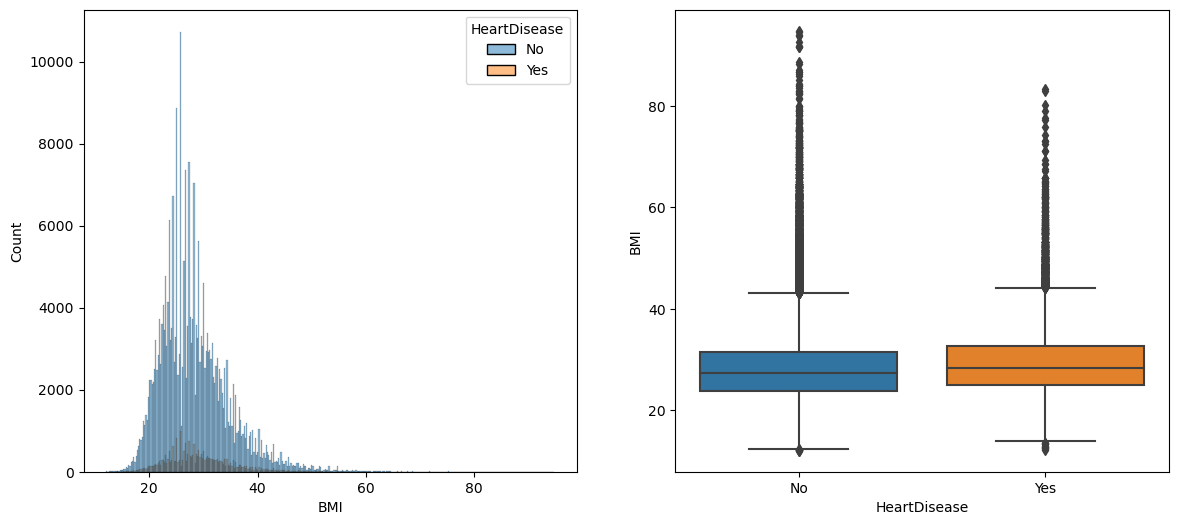

In [102]:

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['BMI'],hue=df['HeartDisease'],ax=ax[0])
sns.boxplot(y=df['BMI'],x=df['HeartDisease'],ax=ax[1])
plt.show()

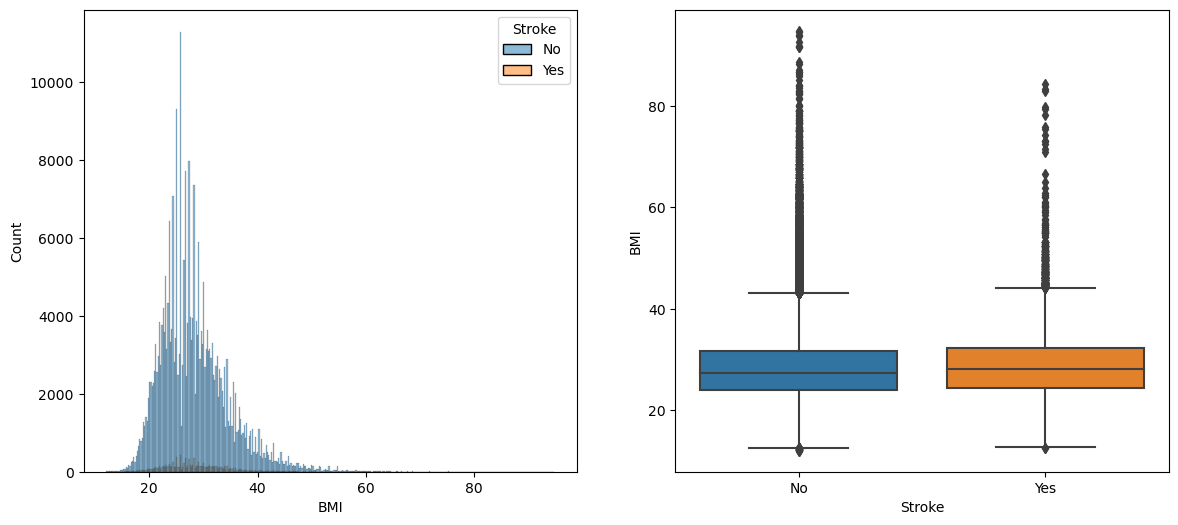

In [104]:

fig, ax=plt.subplots(1,2,figsize=(14,6))
sns.histplot(x=df['BMI'],hue=df['Stroke'],ax=ax[0])
sns.boxplot(y=df['BMI'],x=df['Stroke'],ax=ax[1])
plt.show()

### Multivariate analysis

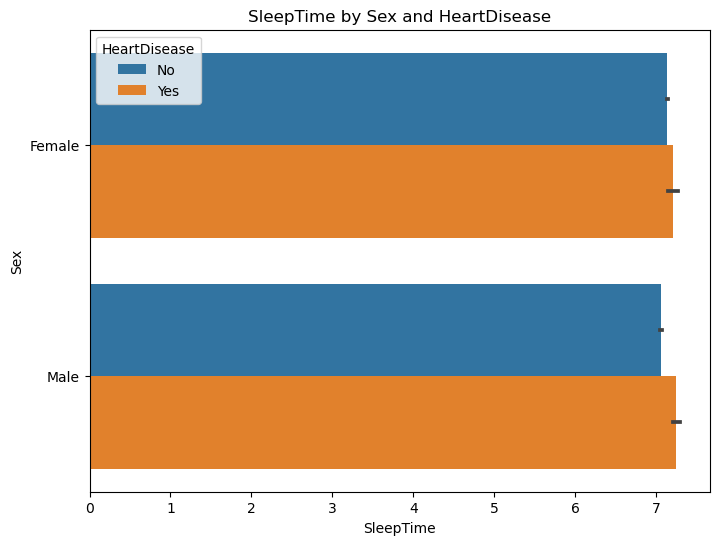

In [30]:
cond2 = (df['PhysicalActivity'] == 'Yes') & (df['GenHealth'] == 'Very good')
fd2 = df[cond2]
plt.figure(figsize=(8, 6))
sns.barplot(data=fd2, x='SleepTime', y='Sex', hue='HeartDisease')
plt.title('SleepTime by Sex and HeartDisease')
plt.xlabel('SleepTime')
plt.ylabel('Sex')
plt.show()

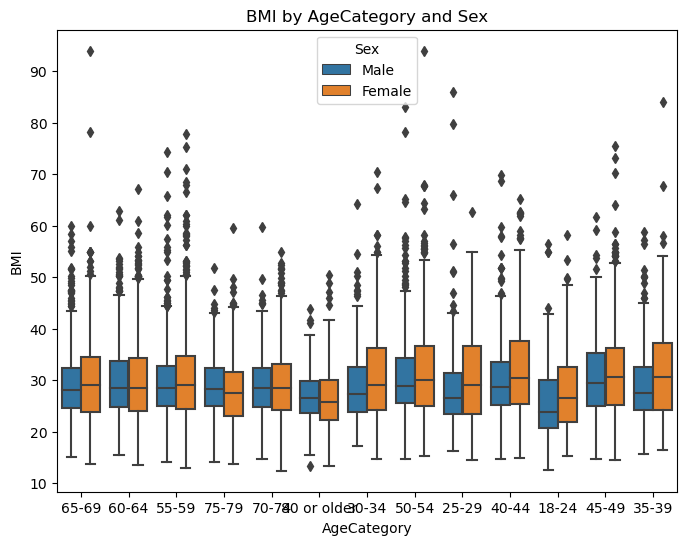

In [31]:

cond3 = (df['Smoking'] == 'Yes') & (df['PhysicalHealth'] >= 5) & (df['MentalHealth'] >= 5)
filtered_data_3 = df[cond3]
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data_3, x='AgeCategory', y='BMI', hue='Sex')
plt.title('BMI by AgeCategory and Sex')
plt.xlabel('AgeCategory')
plt.ylabel('BMI')
plt.show()

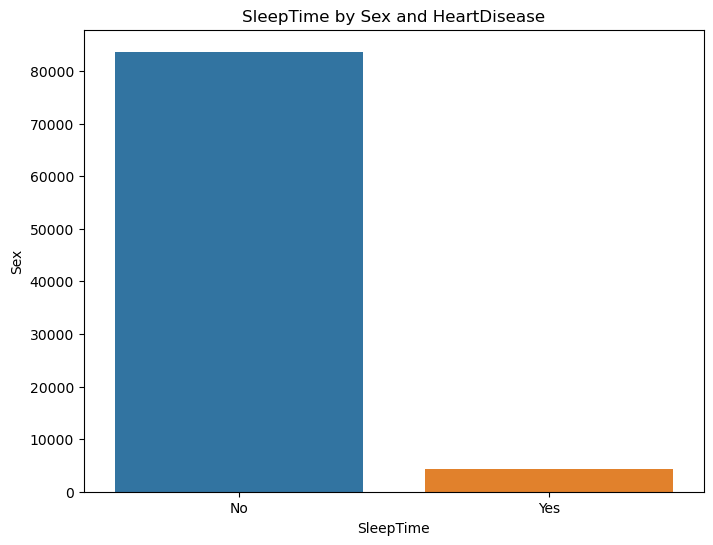

In [33]:
cond4 = (df['Diabetic'] == 'Yes') & (df['PhysicalActivity'] == 'Yes')
fd4 = df[cond4]
plt.figure(figsize=(8, 6))
sns.countplot(data=fd2, x='HeartDisease',hue='')
plt.title('SleepTime by Sex and HeartDisease')
plt.show()



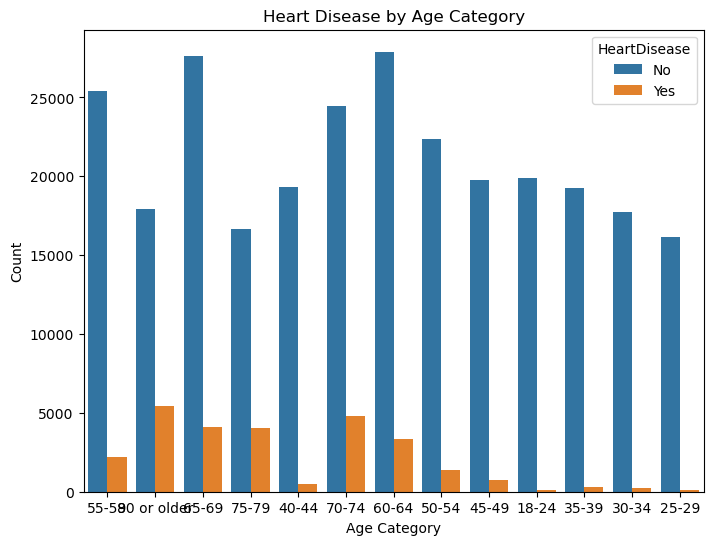

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease')
plt.title('Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

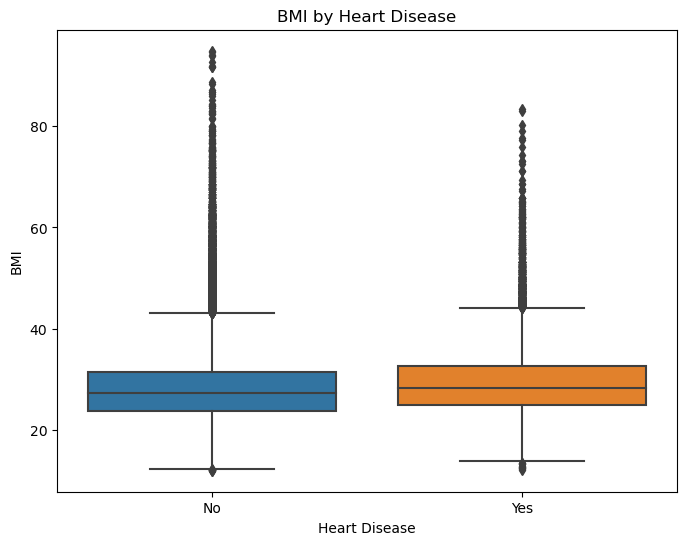

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='HeartDisease', y='BMI')
plt.title('BMI by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

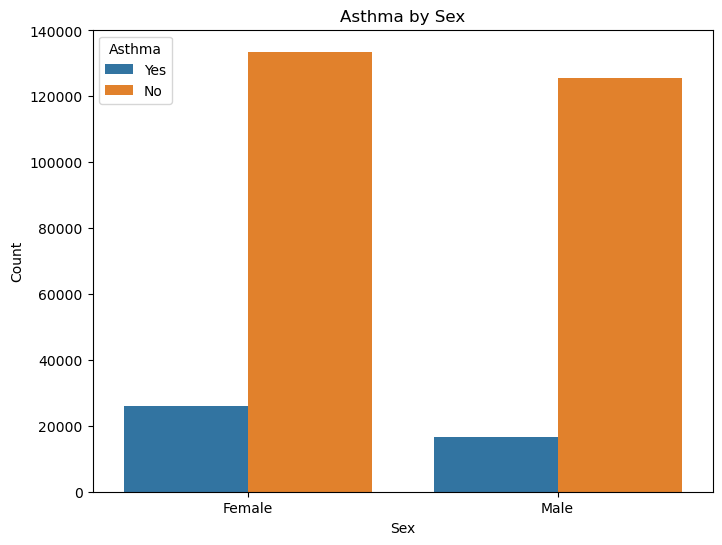

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Asthma')
plt.title('Asthma by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

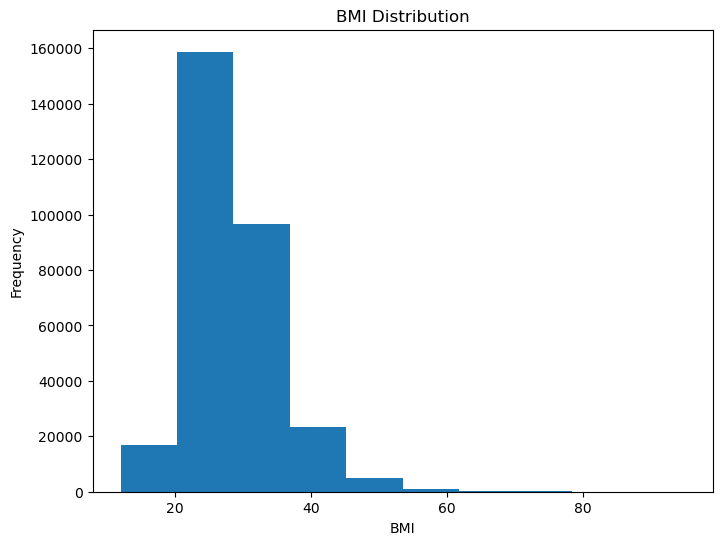

In [59]:
plt.figure(figsize=(8, 6))
plt.hist(df['BMI'], bins=10)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [12]:
obj = list(df.select_dtypes(include=['object']).columns)  # creating a list of all columns with datatype as object
obj

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [13]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    df[i]=LabelEncoder().fit_transform(df[i])
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0


In [14]:

s_df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)    # sacling the data using minmax scaler
s_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-0.315162,-1.830820,1.169689,-0.277556,-0.204083,-0.070301,3.183766,-0.415144,-0.943195,0.136865,0.5135,2.298118,0.556298,1.176833,-1.420852,2.464567,-0.201532,3.049643
1,-0.315162,-1.252600,-0.854928,-0.277556,4.899969,-0.438823,-0.507054,-0.415144,-0.943195,1.531758,0.5135,-0.432740,0.556298,1.176833,-0.057636,-0.405751,-0.201532,-0.327907
2,-0.315162,-0.287869,1.169689,-0.277556,-0.204083,2.017986,3.183766,-0.415144,1.060226,0.694822,0.5135,2.298118,0.556298,-0.807951,0.623971,2.464567,-0.201532,-0.327907
3,-0.315162,-0.654281,-0.854928,-0.277556,-0.204083,-0.438823,-0.507054,-0.415144,-0.943195,1.252779,0.5135,-0.432740,-1.797598,-0.146356,-0.739244,-0.405751,-0.201532,3.049643
4,-0.315162,-0.731583,-0.854928,-0.277556,-0.204083,3.000709,-0.507054,2.408801,-0.943195,-0.700071,0.5135,-0.432740,0.556298,1.176833,0.623971,-0.405751,-0.201532,-0.327907


In [15]:
cor_matrix=s_df.corr()    # calculating the correlation matrix
cor_matrix

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.047260,0.104524,-0.036289,0.194665,0.165235,0.020913,0.196420,0.074435,0.239259,0.042720,0.163686,-0.093597,-0.012220,0.010834,0.035784,0.142672,0.090644
BMI,0.047260,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,0.024200,-0.006069,-0.030300,0.198268,-0.144441,0.029233,-0.048653,0.087563,0.047796,-0.038060
Smoking,0.104524,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,0.087514,0.128259,0.075682,0.047086,-0.089864,0.014055,-0.027874,0.017545,0.031890,0.030438
AlcoholDrinking,-0.036289,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,0.006824,-0.060761,0.043128,-0.063423,0.024408,0.001871,-0.003172,-0.007114,-0.031166,-0.008739
Stroke,0.194665,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,-0.001343,0.141537,0.001201,0.097767,-0.074898,-0.009846,0.013697,0.034942,0.089109,0.046039
PhysicalHealth,0.165235,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,-0.038427,0.114623,0.010179,0.143418,-0.224121,-0.037669,-0.058406,0.110083,0.138219,0.036753
MentalHealth,0.020913,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,-0.098916,-0.158608,-0.002489,0.022475,-0.084274,-0.005259,-0.117078,0.105266,0.032105,-0.040214
DiffWalking,0.196420,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,-0.067335,0.250407,-0.005648,0.198877,-0.271748,-0.045966,-0.019155,0.095826,0.149471,0.060596
Sex,0.074435,0.024200,0.087514,0.006824,-0.001343,-0.038427,-0.098916,-0.067335,1.000000,-0.060620,0.015599,-0.010581,0.045309,-0.011778,-0.014901,-0.067960,-0.007579,0.015846
AgeCategory,0.239259,-0.006069,0.128259,-0.060761,0.141537,0.114623,-0.158608,0.250407,-0.060620,1.000000,0.165041,0.199065,-0.125294,0.036864,0.105025,-0.058823,0.126541,0.267930


<AxesSubplot:>

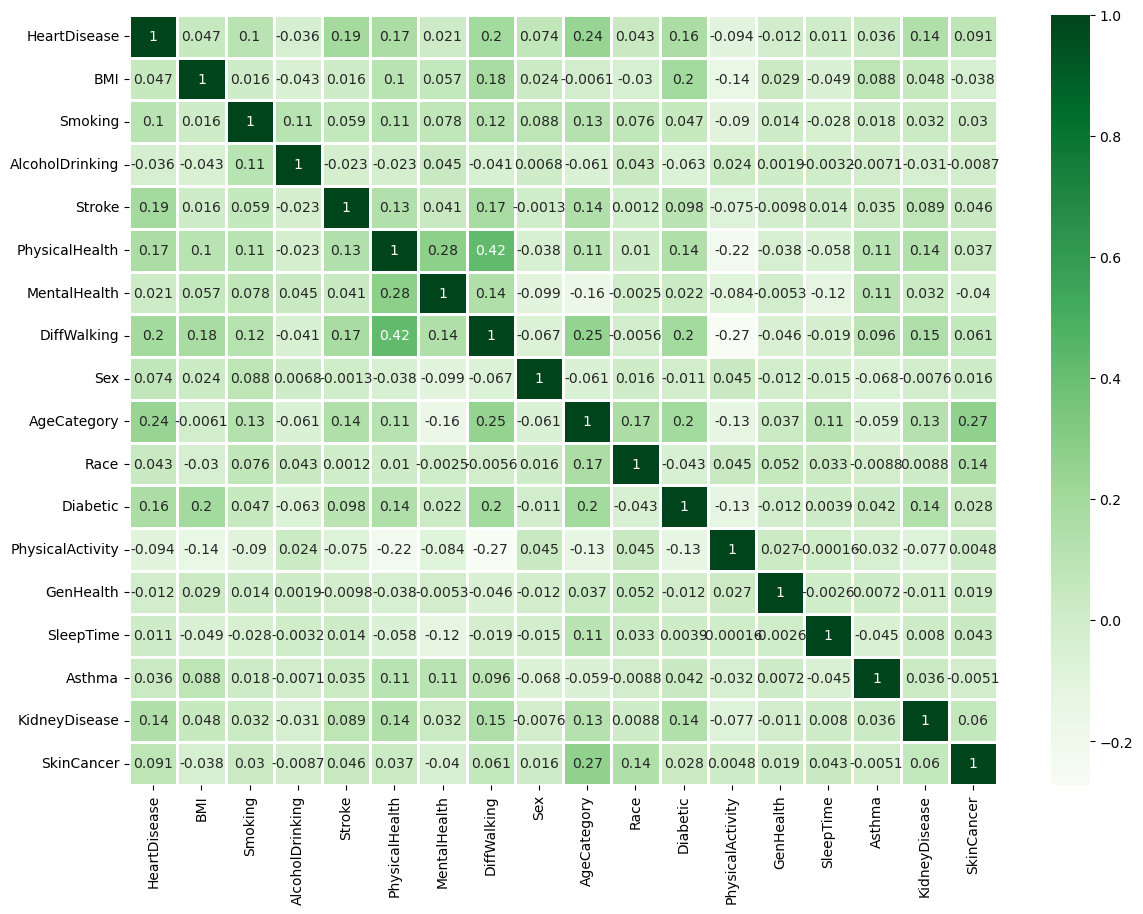

In [16]:
plt.figure(figsize=(14,10))   #visualising the correlation usinf heatmap
sns.heatmap(cor_matrix,annot=True,cmap='Greens', linewidths=1, linecolor='white')   # plotting a heat map to visualise the correlation

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X1=df.drop('HeartDisease',axis=1)       #seperating the features and target variables
y1=df["HeartDisease"] 

In [19]:
os=SMOTE()                  #mitigating the class imbalance using SMOTE
X,y=os.fit_resample(X1,y1)

In [20]:
X=StandardScaler().fit_transform(X)

In [21]:
print(X.shape)  # Check the shape of X
print(y.shape) 

(548912, 17)
(548912,)


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)   # Splitting the data into training and testi

### Logistic Regression

In [31]:
model=LogisticRegression().fit(X_train,y_train)    # fitting the model on training set

In [32]:
model=LogisticRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

In [35]:
log_prob=model.predict_proba(X_test)
log_prob=log_prob[:,1]

In [36]:
log_prob

array([0.88686721, 0.79728601, 0.0769335 , ..., 0.8732692 , 0.57945071,
       0.46529205])

In [37]:
print('Train score: ',model.score(X_train,y_train))   # printing model score for train and test set
print('Test score: ',model.score(X_test,y_test))

Train score:  0.7345056969898864
Test score:  0.7351008659533381


In [38]:
print("accuracy score: ",accuracy_score(y_test,y_pred))   #accuracy score

accuracy score:  0.7351008659533381


In [39]:
cm1=confusion_matrix(y_test,y_pred)   # printing confusion matrix
cm1

array([[57305, 24838],
       [18784, 63747]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

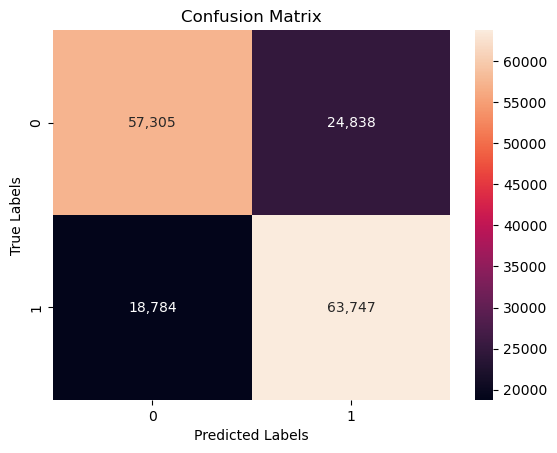

In [40]:
sns.heatmap(cm1,annot=True,fmt=',.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [41]:
print(classification_report(y_test,y_pred))   # printing the classification report

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     82143
           1       0.72      0.77      0.75     82531

    accuracy                           0.74    164674
   macro avg       0.74      0.74      0.73    164674
weighted avg       0.74      0.74      0.73    164674



In [42]:
lr=roc_auc_score(y_test,y_pred)    #roc_auc score fr the model
lr

0.7350127736910615

In [43]:
np.mean(cross_val_score(model,X,y,scoring='accuracy',cv=5))

0.7319898608038935

In [44]:
lprecision = precision_score(y_test, y_pred)
print(lprecision)

0.7196139301236101


In [45]:
r_prob=[0 for i in range(len(y_test))]

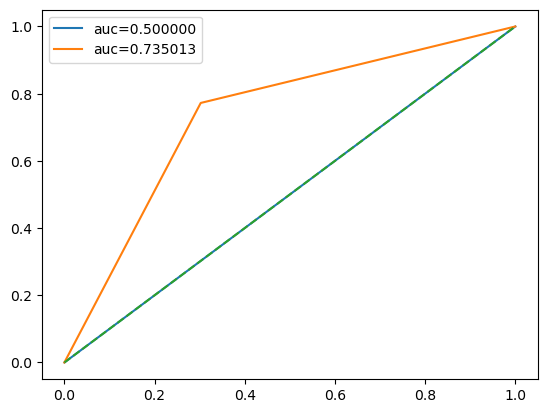

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve


r_fpr,r_tpr,r_threshold=roc_curve(y_test,r_prob)
fpr,tpr,threshold=roc_curve(y_test,y_pred)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='auc={:2f}'.format(auc))
plt.plot([0,1],[0,1],"--")
plt.legend()

### gaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

In [49]:
gnb_model=GaussianNB().fit(X_train,y_train)            # fitting the model on training set
y_predg=gnb_model.predict(X_test)


print(gnb_model.score(X_train,y_train))              # printing model score for train and test set
print(accuracy_score(y_test,y_pred))

0.7077618559330415
0.7351008659533381


In [52]:
GNcm=confusion_matrix(y_test,y_predg)                     # printing confusion matrix
GNcm

array([[56831, 25312],
       [22772, 59759]], dtype=int64)

<AxesSubplot:>

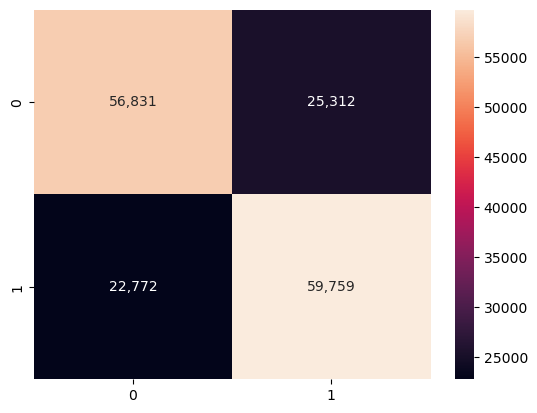

In [53]:
sns.heatmap(GNcm,annot=True,fmt=',.0f')

In [54]:
print(classification_report(y_test,y_predg))              # printing the classification report

              precision    recall  f1-score   support

           0       0.71      0.69      0.70     82143
           1       0.70      0.72      0.71     82531

    accuracy                           0.71    164674
   macro avg       0.71      0.71      0.71    164674
weighted avg       0.71      0.71      0.71    164674



In [55]:
gn=roc_auc_score(y_test,y_predg)                 #roc_auc score fr the model
gn

0.7079669428832325

In [56]:
np.mean(cross_val_score(gnb_model,X,y,scoring='accuracy',cv=5))

0.7036592225367937

In [57]:
r_prob2=[0 for i in range(len(y_test))]

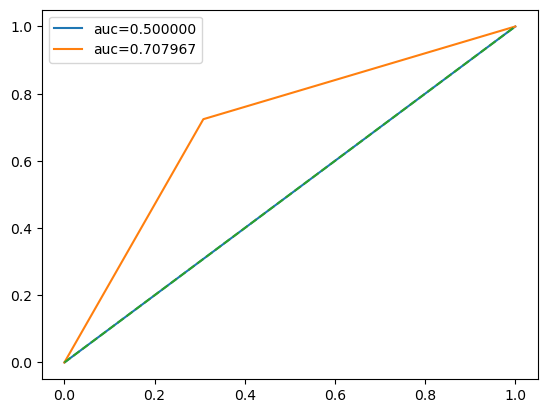

In [58]:
fpr2,tpr2,threshold2=roc_curve(y_test,y_predg)
r_auc2=roc_auc_score(y_test,r_prob2)
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc2))
auc=roc_auc_score(y_test,y_predg)
plt.plot(fpr2,tpr2,label='auc={:2f}'.format(auc))
plt.plot([0,1],[0,1],"--")
plt.legend()

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

In [60]:
kf=KFold(n_splits=5)   

In [61]:
param_grid={'min_samples_split':[10,20,30],              #hyperparameters
           'min_samples_leaf':[20,40,100],
           'max_depth':[3,4,5,6,7,8,9,10]}

In [62]:
dt=DecisionTreeClassifier()

In [63]:
grid_cv=GridSearchCV(dt,param_grid,cv=kf)      #hyperparameter tuning using gridsearch cv

In [64]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30]})

In [65]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20)

In [66]:
grid_cv.best_params_

{'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 20}

In [67]:
grid_cv.best_score_

0.758855193029504

In [75]:
dmodel=DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20).fit(X_train,y_train)
y_pred_dt=dmodel.predict(X_test)                        #fitting the model on training set with best parameters
print(dmodel.score(X_train,y_train))
print(dmodel.score(X_test,y_test))

0.7630973511209198
0.7590147807182676


In [76]:
dcm=confusion_matrix(y_test,y_pred_dt)         # printing confusion matrix
dcm

array([[59553, 22590],
       [17094, 65437]], dtype=int64)

<AxesSubplot:>

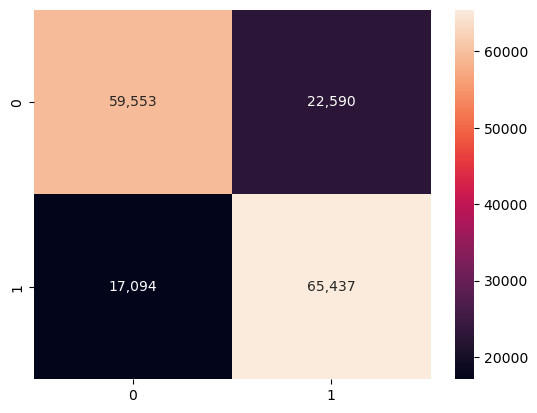

In [77]:
sns.heatmap(dcm,annot=True,fmt=',.0f')

In [78]:
print(classification_report(y_test,y_pred_dt))      # printing classification report

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     82143
           1       0.74      0.79      0.77     82531

    accuracy                           0.76    164674
   macro avg       0.76      0.76      0.76    164674
weighted avg       0.76      0.76      0.76    164674



In [79]:
np.mean(cross_val_score(dmodel,X,y,scoring='accuracy',cv=kf))

0.6849150763811764

In [80]:
dt=roc_auc_score(y_test,y_pred_dt)          #roc_auc score
dt

0.7589348051741632

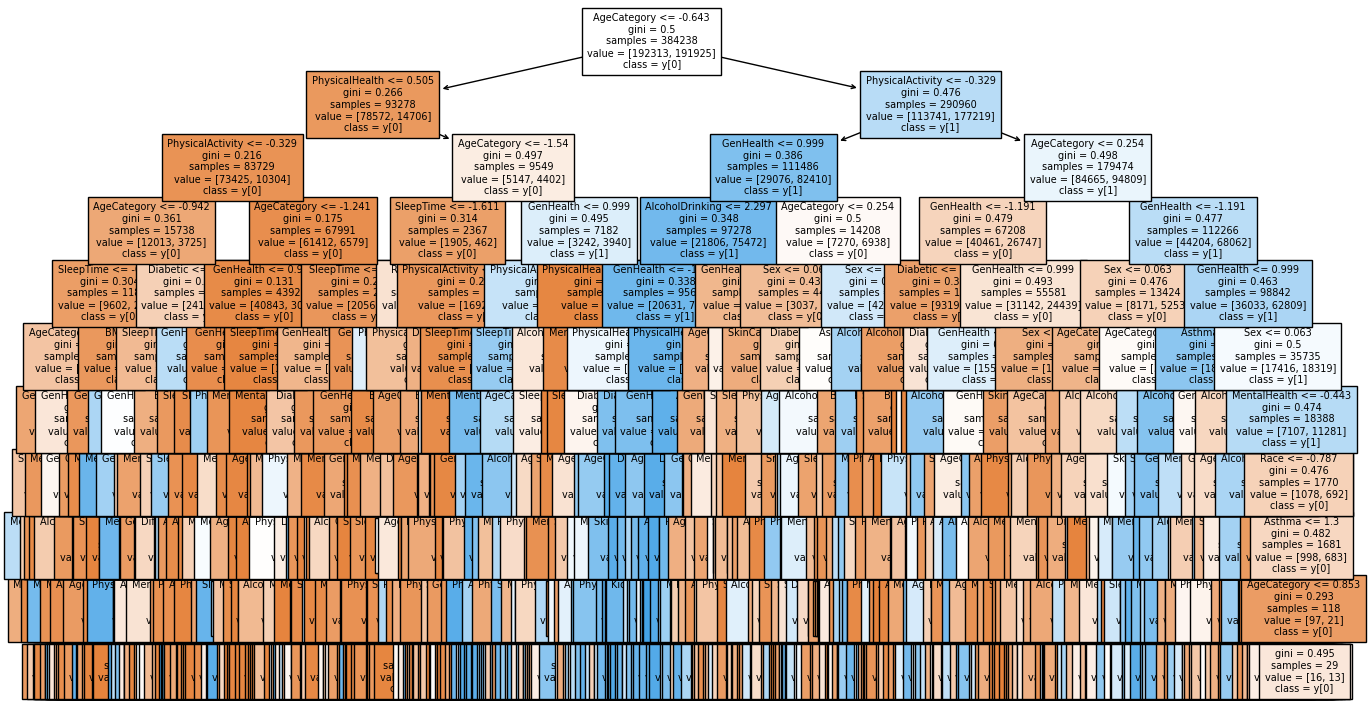

In [81]:
from sklearn import tree
plt.figure(figsize=(16, 9))
tree.plot_tree(grid_cv.best_estimator_, feature_names=X1.columns, class_names=True, filled=True,fontsize=7)
plt.show()

### Random Forest

In [82]:
param_grid2 = {'max_depth': [4,5,6,8,9,10],            #hyperparameters
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10, 20, 40,],}

In [83]:
rf=RandomForestClassifier(random_state=42)

In [84]:
grid_cv2=GridSearchCV(rf,param_grid2,cv=kf)           #hyperparameter tuning

In [85]:
grid_cv2.fit(X_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [10, 20, 30]})

In [86]:
grid_cv2.best_score_

0.7671573384859638

In [87]:
grid_cv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [88]:
grid_cv2.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [89]:
rfmodel=RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10)
rfmodel.fit(X,y)
y_pred_rf=rfmodel.predict(X_test)
print("R_square Training data:",rfmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",rfmodel.score(X_test,y_test))

R_square Training data: 0.7693018389643919
R_square Test data: 0.7686641485601856


In [90]:
rfcm=confusion_matrix(y_test,y_pred_rf)
rfcm

array([[57603, 24540],
       [13555, 68976]], dtype=int64)

<AxesSubplot:>

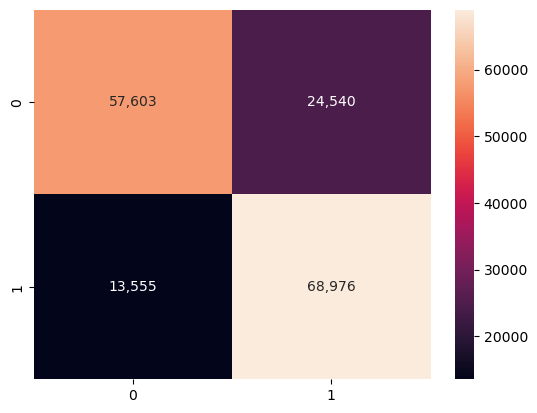

In [91]:
sns.heatmap(rfcm,annot=True,fmt=',.0f')

In [92]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     82143
           1       0.74      0.84      0.78     82531

    accuracy                           0.77    164674
   macro avg       0.77      0.77      0.77    164674
weighted avg       0.77      0.77      0.77    164674



In [93]:
np.mean(cross_val_score(rfmodel,X,y,scoring='accuracy',cv=kf))

0.6733649395334584

In [94]:
rf=roc_auc_score(y_test,y_pred_rf)
rf

0.7685056890445272

### KNeighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
accuracy = []                                          # finding optimal value of n_neighbors
for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X, y)
    score = knn.score(X, y)
    accuracy.append(score)
    print(i, ":", score)

accuracy=[]                                               # finding optimal value of n_neighbors
for i in range(2,11):        
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy.append(np.mean(score))
    print(i, ":", np.mean(score))

In [30]:
k=2
kmodel=KNeighborsClassifier(k).fit(X_train,y_train)             #fitting the model on training set
y_pred_kn=kmodel.predict(X_test)

In [31]:
print(kmodel.score(X_train,y_train))               #printing model scores
print(kmodel.score(X_test,y_test))  

0.9487401037898386


KeyboardInterrupt: 

In [ ]:
confusion_matrix(y_test,y_pred_kn)              

In [ ]:
print(classification_report(y_test,y_pred_kn))   

In [ ]:
np.mean(cross_val_score(kmodel,X,y,scoring='accuracy',cv=kf))

In [ ]:
kn=roc_auc_score(y_test,y_pred_kn)       # printing roc_auc score
kn

### Stacking

In [ ]:
level1 = []
level1.append(('lr', LogisticRegression()))
level1.append(('GNB', GaussianNB()))
level1.append(('SVM', SVC()))
level1.append(('DT', DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20, random_state=42)))
level1.append(('RF', RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)))
level2 = LogisticRegression()

stack_model = StackingClassifier(estimators=level1, final_estimator=level2)

stack_model.fit(X, y)  # Training the StackingClassifier on the entire dataset

level1 = []
level1.append(('lr', LogisticRegression()))
level1.append(('GNB', GaussianNB()))
level1.append(('SVM', SVC()))
level1.append(('DT', DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20, random_state=42)))
level1.append(('RF', RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10, random_state=42)))
level2 = LogisticRegression()


kf = KFold(n_splits=5)       # Creating the cross-validation generator

stack_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=kf)  # Creating the StackingClassifier

In [ ]:
smodel=stack_model.fit(X_train,y_train)
y_preds=smodel.predict(X_test)

In [ ]:
print(smodel.score(X_train,y_train))
print(smodel.score(X_test,y_test)) 

In [ ]:
scm=confusion_matrix(y_test,y_preds)
scm

In [ ]:
sns.heatmap(scm,annot=True,fmt=',.0f')

In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
st=roc_auc_score(y_test,y_preds)
st

In [ ]:
np.mean(cross_val_score(smodel,X,y,scoring='accuracy',cv=kf))